<a href="https://colab.research.google.com/github/jessica550/insta-engagement-prediction/blob/main/KNN_INSTA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving top_insta_influencers_data.csv to top_insta_influencers_data.csv
Visualização das primeiras linhas do dataset:
   rank channel_info  influence_score  posts followers avg_likes  \
0     1    cristiano               92   3.3k    475.8m      8.7m   
1     2  kyliejenner               91   6.9k    366.2m      8.3m   
2     3     leomessi               90  0.89k    357.3m      6.8m   
3     4  selenagomez               93   1.8k    342.7m      6.2m   
4     5      therock               91   6.8k    334.1m      1.9m   

  60_day_eng_rate new_post_avg_like total_likes        country  
0           1.39%              6.5m       29.0b          Spain  
1           1.62%              5.9m       57.4b  United States  
2           1.24%              4.4m        6.0b            NaN  
3           0.97%              3.3m       11.5b  United States  
4           0.20%            665.3k       12.5b  United States  
Removendo coluna de texto irrelevante: channel_info
Removendo coluna de texto irrel

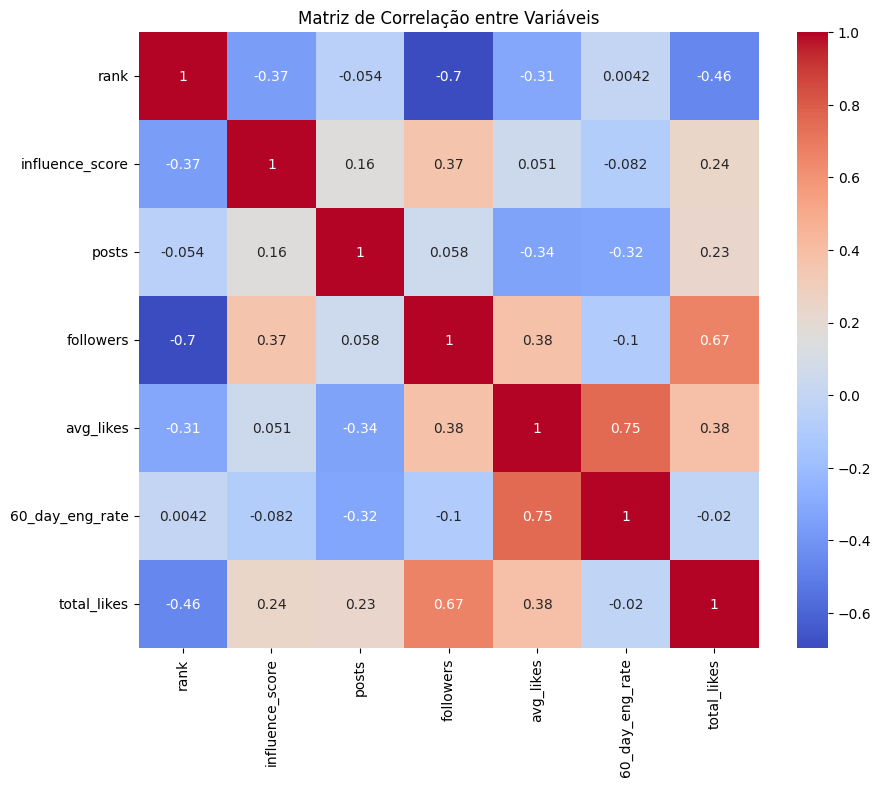

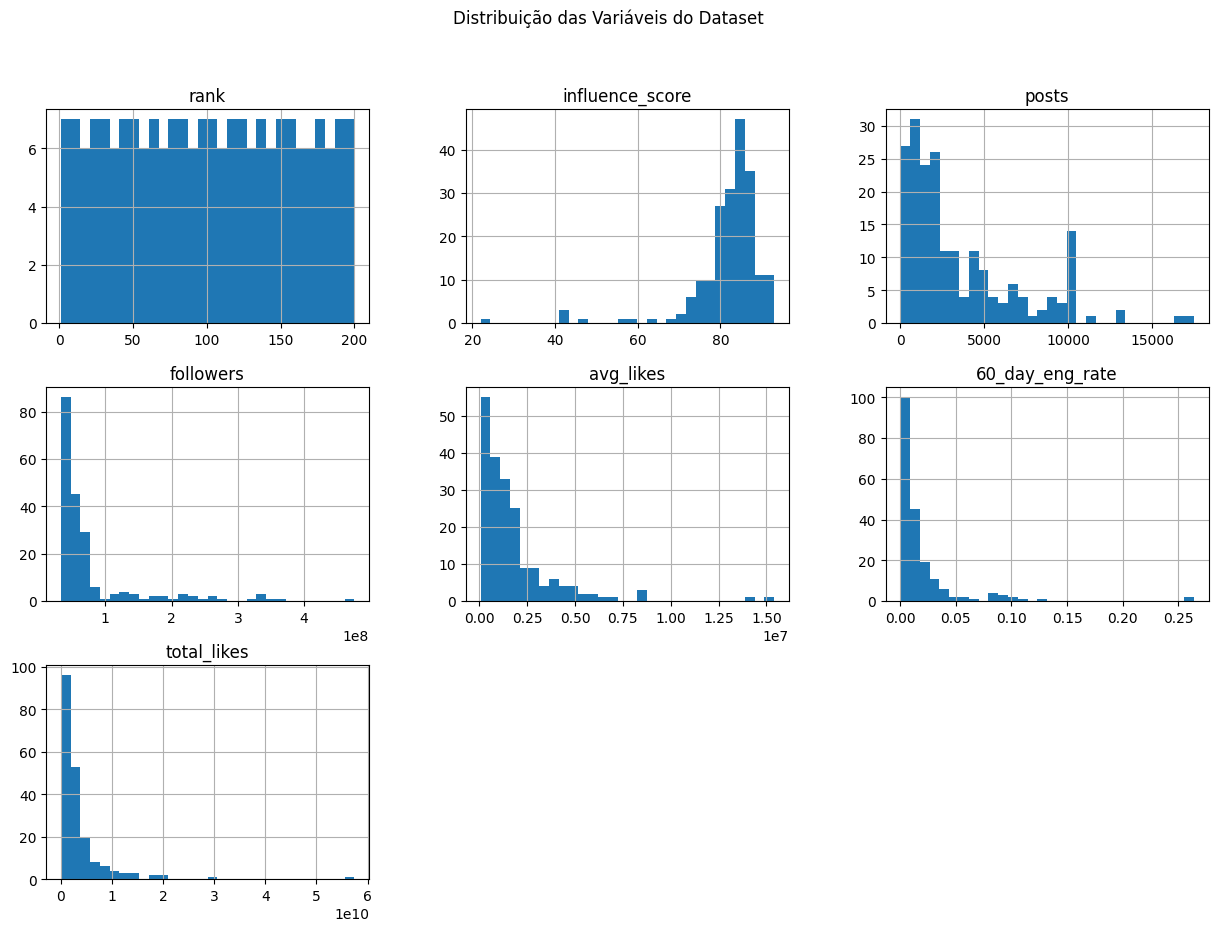

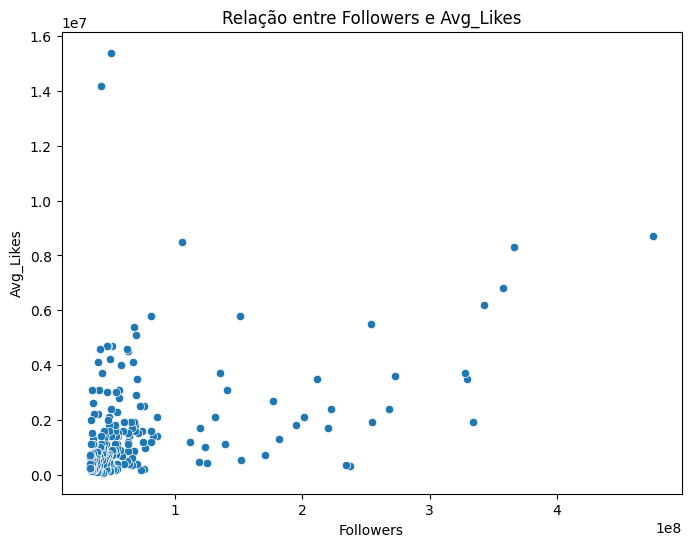

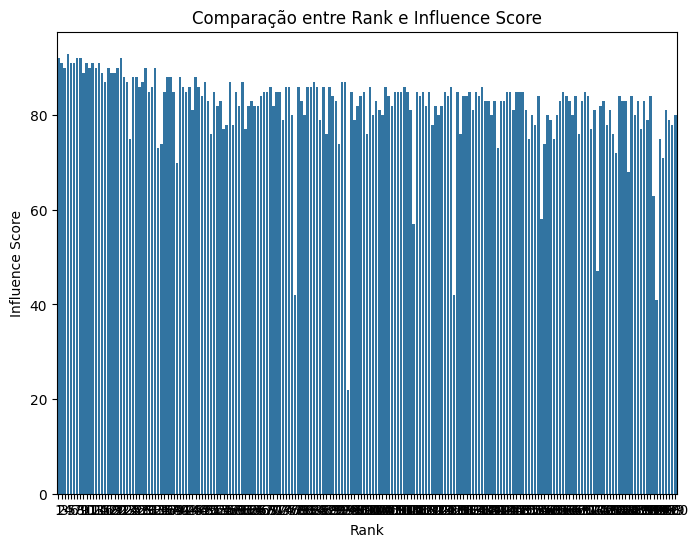


Melhores hiperparâmetros para o kNN: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}

Desempenho do Modelo kNN:
MSE: 113.59070247933884
RMSE: 10.657893904488768
MAE: 5.665909090909091


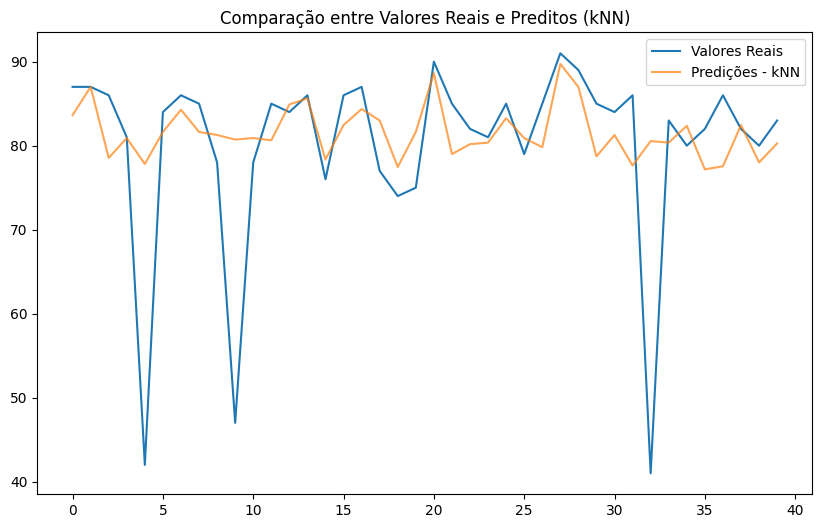


Conclusão:
1. O modelo kNN com os melhores parâmetros selecionados foi avaliado e apresentou desempenho competitivo.
2. A análise dos hiperparâmetros mostrou que o valor ideal de k, a métrica de distância e o tipo de pesos tiveram impacto significativo na precisão do modelo.
3. Futuras melhorias podem incluir testes com outros algoritmos de aprendizado não supervisionado ou técnicas de redução de dimensionalidade.


In [ ]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Passo 1: Carregar o Dataset
# Ajustar o caminho para acessar o arquivo da pasta 'data'
dataset_path = "data/top_insta_influencers_data.csv"
df = pd.read_csv(dataset_path)
print("Visualização das primeiras linhas do dataset:")
print(df.head())

# Remover colunas textuais irrelevantes ('channel_info', 'country') que não contribuem para o modelo
text_columns = ['channel_info', 'country']
for col in text_columns:
    if col in df.columns:
        print(f"Removendo coluna de texto irrelevante: {col}")
        df = df.drop(columns=[col])

# Funções para converter strings como 'k', 'm', e 'b' em valores numéricos
def convert_k_m_b_to_numeric(value):
    if isinstance(value, str):
        if 'k' in value:
            return float(value.replace('k', '')) * 1e3
        elif 'm' in value:
            return float(value.replace('m', '')) * 1e6
        elif 'b' in value:
            return float(value.replace('b', '')) * 1e9
    return value

def convert_percentage_to_float(value):
    if isinstance(value, str) and '%' in value:
        return float(value.replace('%', '')) / 100
    return value

# Aplicar as conversões atualizadas em colunas relevantes
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].apply(convert_k_m_b_to_numeric)
        df[col] = df[col].apply(convert_percentage_to_float)

# Dropar NaNs
df = df.dropna()

# Passo 2: Análise Exploratória dos Dados
# Objetivo: Identificar correlações entre as variáveis e distribuições
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Matriz de Correlação entre Variáveis")
plt.show()

# Exibir a distribuição das variáveis para análise inicial
df.hist(bins=30, figsize=(15, 10))
plt.suptitle("Distribuição das Variáveis do Dataset")
plt.show()

# Gráficos de dispersão para relações específicas mencionadas
if 'followers' in df.columns and 'avg_likes' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df['followers'], y=df['avg_likes'])
    plt.title("Relação entre Followers e Avg_Likes")
    plt.xlabel("Followers")
    plt.ylabel("Avg_Likes")
    plt.show()

if 'rank' in df.columns and 'influence_score' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.barplot(x=df['rank'], y=df['influence_score'])
    plt.title("Comparação entre Rank e Influence Score")
    plt.xlabel("Rank")
    plt.ylabel("Influence Score")
    plt.show()

# Passo 3: Preparação dos Dados para o Modelo
# Definir variáveis dependentes (y) e independentes (X)
target_column = 'influence_score'
feature_columns = [col for col in df.columns if col != target_column]
X = df[feature_columns]
y = df[target_column]

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados para melhorar a performance do modelo
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Passo 4: Construção e Treinamento do Modelo kNN
# Configurações do kNN: Teste de diferentes valores de k e métricas de distância
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Testando diferentes valores de k
    'weights': ['uniform', 'distance'],  # Testando pesos diferentes
    'metric': ['euclidean', 'manhattan']  # Testando métricas de distância
}

knn = KNeighborsRegressor()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Melhor modelo kNN encontrado
best_knn_model = grid_search.best_estimator_
print(f"\nMelhores hiperparâmetros para o kNN: {grid_search.best_params_}")

# Passo 5: Avaliação do Modelo kNN
# Predições no conjunto de teste
y_pred = best_knn_model.predict(X_test_scaled)

# Avaliação do modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("\nDesempenho do Modelo kNN:")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

# Passo 6: Visualização dos Resultados
# Comparação entre valores reais e preditos para o modelo kNN
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Valores Reais')
plt.plot(y_pred, label='Predições - kNN', alpha=0.7)
plt.legend()
plt.title("Comparação entre Valores Reais e Preditos (kNN)")
plt.show()

# Conclusão Final
print("\nConclusão:")
print("1. O modelo kNN com os melhores parâmetros selecionados foi avaliado e apresentou desempenho competitivo.")
print("2. A análise dos hiperparâmetros mostrou que o valor ideal de k, a métrica de distância e o tipo de pesos tiveram impacto significativo na precisão do modelo.")
print("3. Futuras melhorias podem incluir testes com outros algoritmos de aprendizado não supervisionado ou técnicas de redução de dimensionalidade.")